# Brette_et_al_2007

code source: https://brian2.readthedocs.io/en/stable/examples/CUBA.html

paper: https://link.springer.com/article/10.1007/s10827-007-0038-6

In [1]:
from brian2 import *

def Brette2007(integrator):

    taum = 20*ms
    taue = 5*ms
    taui = 10*ms
    Vt = -50*mV
    Vr = -60*mV
    El = -49*mV

    eqs = '''
    dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
    dge/dt = -ge/taue : volt
    dgi/dt = -gi/taui : volt
    '''

    P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,
    method='exact')
    P.v = 'Vr + rand() * (Vt - Vr)'
    P.ge = 0*mV
    P.gi = 0*mV

    we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
    wi = (-20*4.5/10)*mV # inhibitory synaptic weight
    Ce = Synapses(P, P, on_pre='ge += we')
    Ci = Synapses(P, P, on_pre='gi += wi')
    Ce.connect('i<3200', p=0.02)
    Ci.connect('i>=3200', p=0.02)

    s_mon = SpikeMonitor(P)

    run(1 * second)

    plot(s_mon.t/ms, s_mon.i, ',k')
    xlabel('Time (ms)')
    ylabel('Neuron index')
    show()
    
    

exact


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


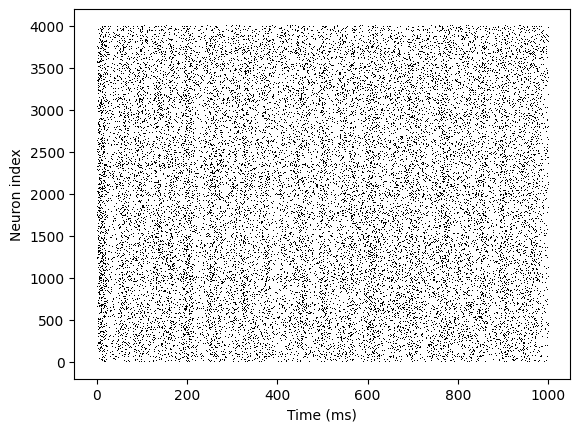

exponential_euler


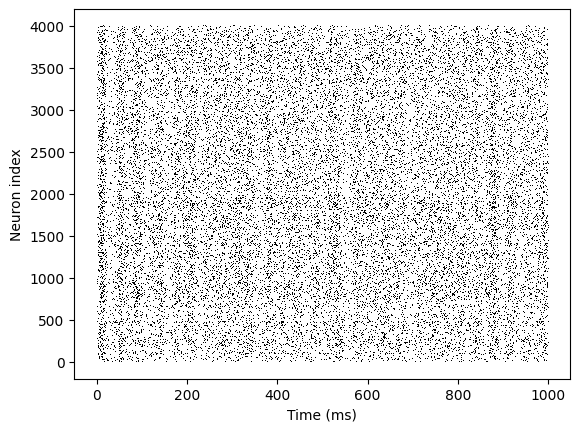

euler


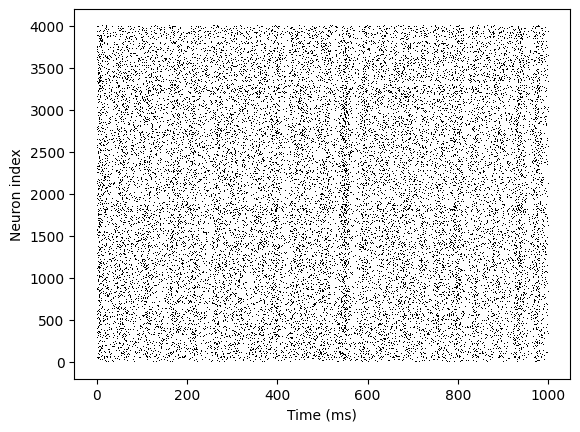

rk2


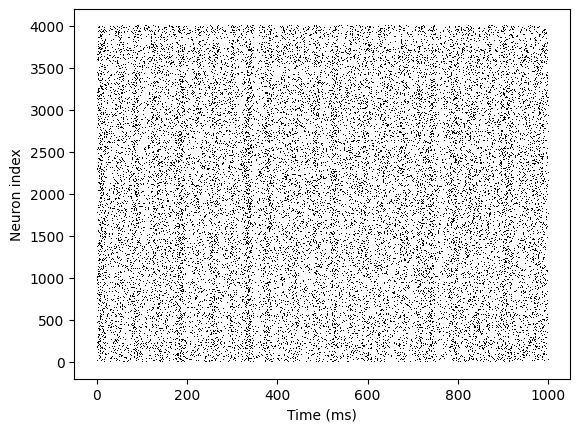

rk4


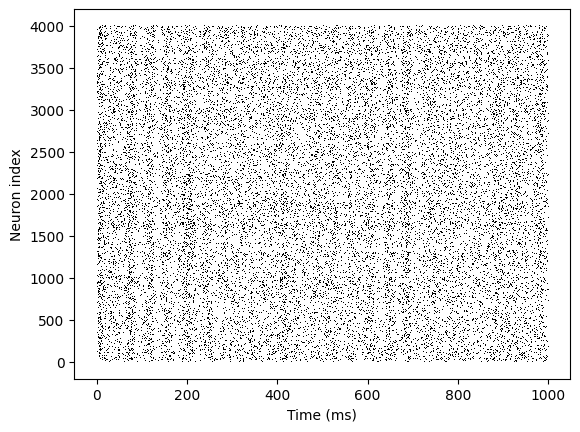

heun


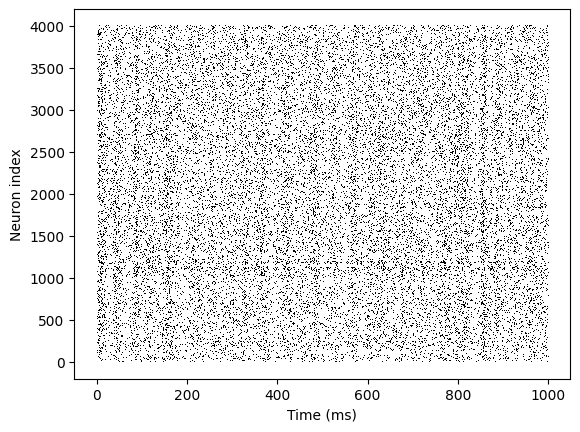

milstein


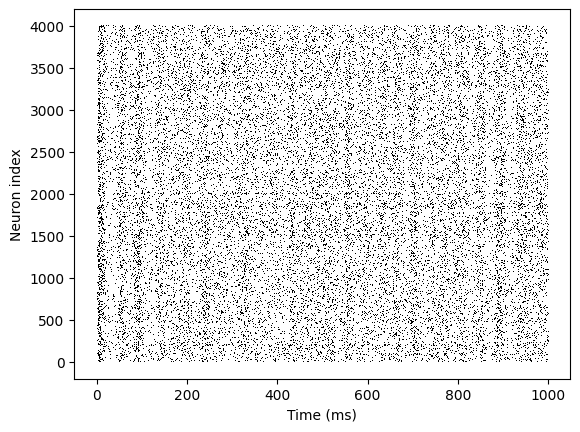

In [2]:
integrators=['exact', 'exponential_euler', 'euler', 'rk2', 'rk4', 'heun', 'milstein']
for integrator in integrators:
    print(integrator)
    Brette2007(integrator)